# Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [45]:
import matplotlib.pyplot as plt

from main import read_bills 
from extract_tags import entities_dataframe

In [3]:
tagged_bills = read_bills('./results')

In [48]:
entities = entities_dataframe(tagged_bills)

In [5]:
entities.describe()

,bill_path,orth,lex,ner,coarse_ner
count,241730,241730,241730,29636,29636
unique,105,15776,6689,34,8
top,2001_1441.txt,.,.,nam_org_institution,nam_org
freq,9178,22145,22145,10991,13735


# Frequency

## Fine-Grained

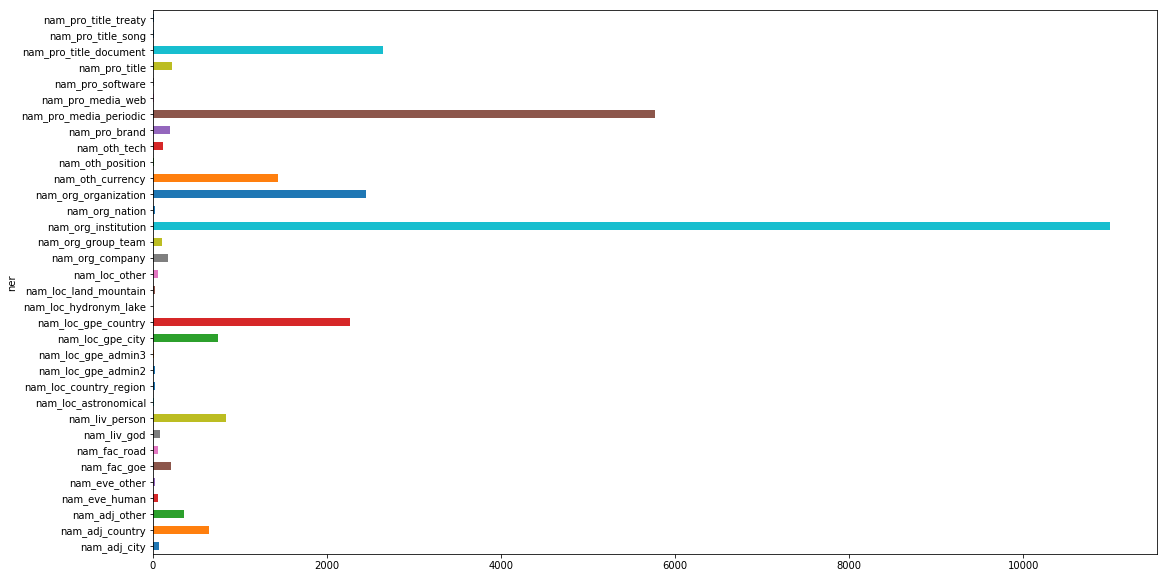

In [7]:
entities.groupby('ner').count()['orth'].plot.barh(figsize=(18, 10))
plt.show()

## Coarse-Grained

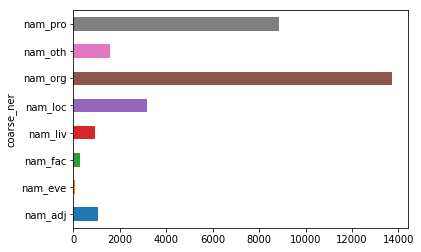

In [6]:
entities.groupby('coarse_ner').count()['orth'].plot.barh()
plt.show()

# Most Frequent Entities

## Top 50 Named Entities

In [8]:
tmp_df = entities.groupby('lex').count().sort_values(by='bill_path', ascending=False)
lex_freq = tmp_df.reset_index()[['lex', 'bill_path']][:50]
lex_freq.columns = ['lex', 'count']

In [25]:
for index, row in lex_freq.iterrows():
    lex = row['lex']
    count = row['count']
    ners = entities[entities['lex'] == lex]['ner'].unique()
    
    print('{}. "{}" - {}'.format(index, lex, count))
    
    for ner in ners:
        if ner is not None:
            print('\t{}'.format(ner))
    print('-------------------------------------')

0. "." - 22145
	nam_pro_media_periodic
	nam_loc_gpe_country
	nam_pro_title_document
	nam_oth_currency
	nam_org_institution
	nam_loc_gpe_city
	nam_liv_person
	nam_pro_title
	nam_adj_country
	nam_adj_other
	nam_fac_road
	nam_org_organization
	nam_org_nation
	nam_org_company
	nam_loc_gpe_admin2
	nam_org_group_team
	nam_eve_human
	nam_fac_goe
	nam_loc_hydronym_lake
	nam_loc_astronomical
	nam_eve_other
	nam_pro_title_song
	nam_pro_brand
-------------------------------------
1. "," - 15473
	nam_loc_gpe_country
	nam_org_institution
	nam_pro_media_periodic
	nam_oth_currency
	nam_oth_tech
	nam_pro_title_document
	nam_loc_gpe_city
	nam_org_organization
	nam_liv_person
	nam_adj_country
	nam_adj_other
	nam_liv_god
	nam_pro_title
	nam_org_group_team
	nam_pro_media_web
	nam_fac_goe
	nam_org_company
	nam_eve_human
	nam_fac_road
	nam_pro_brand
	nam_pro_software
	nam_oth_position
	nam_adj_city
-------------------------------------
2. "w" - 9313
	nam_liv_person
	nam_org_institution
	nam_loc_gpe_country


26. "dzień" - 1452
	nam_loc_gpe_country
	nam_org_institution
	nam_pro_title_document
	nam_loc_gpe_city
	nam_liv_person
	nam_adj_other
	nam_pro_media_periodic
	nam_org_organization
	nam_fac_goe
	nam_oth_currency
	nam_pro_title_song
	nam_adj_country
-------------------------------------
27. "być" - 1400
	nam_org_institution
	nam_liv_person
	nam_org_organization
	nam_org_company
	nam_pro_title_document
	nam_fac_goe
	nam_loc_gpe_city
	nam_pro_media_periodic
	nam_loc_gpe_country
	nam_adj_country
	nam_pro_title
	nam_adj_other
	nam_loc_other
	nam_liv_god
	nam_oth_currency
-------------------------------------
28. "mowa" - 1272
	nam_liv_person
	nam_org_institution
	nam_pro_title_document
	nam_org_company
	nam_org_organization
	nam_loc_gpe_country
	nam_loc_gpe_city
	nam_adj_other
	nam_oth_currency
-------------------------------------
29. ";" - 1194
	nam_oth_currency
	nam_oth_tech
	nam_pro_title_document
	nam_org_institution
	nam_liv_person
	nam_org_organization
	nam_loc_gpe_admin2
	nam_loc_gpe

## Top 10 Named Entities For Each Coarse-Grained Type

In [44]:
for coarse_ner, cner_df in entities.groupby('coarse_ner'):
    print(coarse_ner)
    
    top = cner_df[cner_df['lex'].str.len() > 1] \
            .groupby('lex') \
            .count() \
            .sort_values(by='bill_path', ascending=False) \
            .reset_index()
    
    for _, t in top[:10].iterrows():
        print('\t{} - {}'.format(t['lex'], t['bill_path']))
    print('----------------')

nam_adj
	polski - 56
	europejski - 43
	nakaz - 38
	do - 17
	waluta - 13
	który - 12
	na - 11
	wojewódzki - 10
	jeżeli - 9
	lub - 9
----------------
nam_eve
	się - 4
	na - 3
	rama - 3
	realizować - 2
	zadanie - 2
	wyraz - 2
	wojna - 2
	specjalny - 2
	rzecz - 2
	przedakcesyjny - 2
----------------
nam_fac
	państwo - 7
	do - 7
	biblioteka - 6
	ewangelicko - 6
	kościół - 6
	narodowy - 4
	dzień - 4
	stosunek - 3
	ustawa - 3
	na - 3
----------------
nam_liv
	główny - 16
	ustawa - 12
	na - 12
	sekunda - 11
	do - 10
	przez - 9
	inspektor - 9
	ośrodek - 9
	który - 8
	lekarz - 8
----------------
nam_loc
	rzeczpospolita - 155
	polski - 147
	Polska - 83
	na - 63
	terytorium - 47
	niepodległość - 42
	dzień - 30
	wolność - 29
	który - 29
	do - 26
----------------
nam_org
	minister - 336
	przez - 179
	do - 178
	państwo - 140
	prezes - 134
	rad - 121
	sprawa - 111
	na - 109
	lub - 109
	narodowy - 107
----------------
nam_oth
	złoty - 287
	000 - 54
	do - 27
	tys - 23
	powyżej - 18
	10 - 16
	kar - 13
	k